<a href="https://colab.research.google.com/github/forMwish/MyDeepLearn/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 准备

## 1.1 挂载 google drive


In [38]:
from google.colab import drive
import os

gdrive_path = '/gdrive'
drive.mount(gdrive_path, force_remount=True)

os.chdir("%s/MyDrive"%gdrive_path)
os.listdir("%s/MyDrive"%gdrive_path)

Mounted at /gdrive


['openmp-4.5.pdf',
 'openmp-4.5.gdoc',
 'ARM Architecture Reference Manual ARMv8, f - ARM Limited.pdf',
 'Colab Notebooks',
 'history_imdb.npy',
 'train_data',
 'train_history',
 'history',
 'model']

## 1.2 数据集处理

In [40]:
from keras.datasets import mnist
import numpy as np
from keras.utils import to_categorical


(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape(60000, -1).astype(np.float32) / 255
test_images = test_images.reshape(10000, -1).astype(np.float32) / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

validation_image = train_images[:10000]
validation_labels = train_labels[:10000]
partial_train_images = train_images[10000:]
partial_train_labels = train_labels[10000:]

# 2. 模型

## 2.1 构建

In [41]:
from keras import models
from keras import layers

from keras import optimizers
from keras import losses
from keras import metrics


network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28, )))
network.add(layers.Dense(10, activation="softmax"))
network.compile(optimizer=optimizers.RMSprop(lr=0.001),
        loss=losses.categorical_crossentropy,
        metrics=metrics.categorical_accuracy)
network.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## 2.2 训练

In [42]:
network.fit(partial_train_images, 
      partial_train_labels, 
      epochs=5, 
      batch_size=128, 
      validation_data=(validation_image, validation_labels))


Epoch 1/5
391/391 [==============================] - 4s 8ms/step - loss: 0.4580 - categorical_accuracy: 0.8664 - val_loss: 0.1479 - val_categorical_accuracy: 0.9565
Epoch 2/5
391/391 [==============================] - 3s 8ms/step - loss: 0.1285 - categorical_accuracy: 0.9610 - val_loss: 0.1182 - val_categorical_accuracy: 0.9647
Epoch 3/5
391/391 [==============================] - 3s 8ms/step - loss: 0.0786 - categorical_accuracy: 0.9763 - val_loss: 0.1000 - val_categorical_accuracy: 0.9697
Epoch 4/5
391/391 [==============================] - 3s 8ms/step - loss: 0.0528 - categorical_accuracy: 0.9849 - val_loss: 0.0902 - val_categorical_accuracy: 0.9740
Epoch 5/5
391/391 [==============================] - 3s 8ms/step - loss: 0.0401 - categorical_accuracy: 0.9880 - val_loss: 0.0794 - val_categorical_accuracy: 0.9777


# 3 model 数据存储

In [43]:
import pickle
import os


history_path = './history/mnist_base.pickle'
model_path = './model/mnist_base'

history_dir = os.path.dirname(history_path)
model_dir = os.path.dirname(model_path)

if not os.path.isdir(history_dir):
  os.mkdir(history_dir)
if not os.path.isdir(model_dir):
  os.mkdir(model_dir)

fp = open(history_path, 'wb')
pickle.dump(network.history.history, fp)
fp.close()

network.save(model_path)

INFO:tensorflow:Assets written to: ./model/mnist_base/assets


# 4. model 数据恢复

In [44]:
import pickle

history_path = './history/mnist_base.pickle'
fp = open(history_path, 'rb')

history = pickle.load(fp)
fp.close()
model_path = './model/mnist_base'
network = models.load_model(model_path)

# 5. history 分析


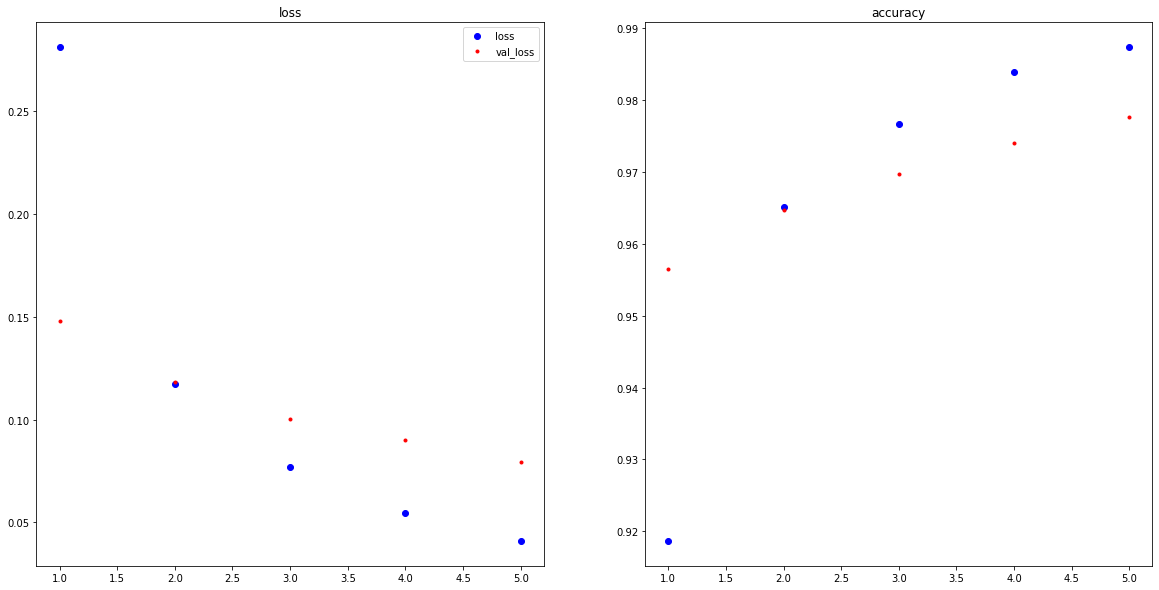

In [45]:
import matplotlib.pyplot as plt

loss = history['loss']
accuracy = history['categorical_accuracy']
val_loss = history['val_loss']
val_accuracy = history['val_categorical_accuracy']

epoch = range(1, len(loss)+1)

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.title('loss')
plt.plot(epoch, loss, 'bo', label='loss')
plt.plot(epoch, val_loss, 'r.', label='val_loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('accuracy')
plt.plot(epoch, accuracy, 'bo', label='accuracy')
plt.plot(epoch, val_accuracy, 'r.', label='val_accuracy')
plt.show()

## 5.1 测试集验证

In [46]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0724 - categorical_accuracy: 0.9789
0.9789000153541565


## 其他

In [ ]:
import matplotlib.pyplot as plt
digit = train_images[4].reshape(28,28)
print(digit.shape)
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()



In [ ]:
for j in range(0, 6, 2):
  print(j)